In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNIa_PrePeak_Mean', 'Fast Microlensing_Mean', 'Slow Microlensing_Mean',
       'KN_PrePeak_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Mean', 'TDEsPopMetric__some_color_pu_Mean',
       'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFS,u', 'DD:EDFSa,u', 'DD:EDFSb,u',
       'DD:ELAISS1,g', 'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g',
       'DD:EDFS,g', 'DD:EDFSa,g', 'DD:EDFSb,g', 'DD:ELAISS1,r', 'DD:XMM-LSS,r',
       'DD:ECDFS,r', 'DD:COSMOS,r', 'DD:EDFS,r', 'DD:EDFSa,r', 'DD:EDFSb,r',
       'DD:ELAISS1,i', 'DD:XMM-LSS,i', 'D

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNIa_PrePeak_Mean',
        'TDEsPopMetric__some_color_pu_Mean',
        'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        'Fast Microlensing_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding']#,
       #'NEO bright', 'NEO faint', 'TNO']#,
#        '3 pairs in 15 nights detection loss NEO H=16.0',
#        '3 pairs in 30 nights detection loss NEO H=22.0',
#       '3 pairs in 15 nights detection loss TNO H=4.0']

linear_cols = []#['SNIa_PrePeak_Mean',
           #'TDEsPopMetric__some_color_pu_Mean',
           #'Fast Microlensing_Mean',
           #'3 pairs in 15 nights detection loss NEO H=16.0',
           #'3 pairs in 30 nights detection loss NEO H=22.0',
           #'3 pairs in 15 nights detection loss TNO H=4.0']

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNIa_PrePeak_Mean': 'SNeIa', 'Fast Microlensing_Mean': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Mean': 'TDE',
               'TDEsPopMetric__some_color_pu_Mean':'TDE',
               'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
data['runName']


0    baseline_nexp2
1       ddf_pre_fn0
2       ddf_pre_fn1
3       ddf_pre_fn2
4       ddf_pre_fn3
5       ddf_pre_fn4
Name: runName, dtype: object

In [6]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'ddf' in name]
runs

['baseline_nexp2',
 'ddf_pre_fn0',
 'ddf_pre_fn1',
 'ddf_pre_fn2',
 'ddf_pre_fn3',
 'ddf_pre_fn4']

In [7]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)

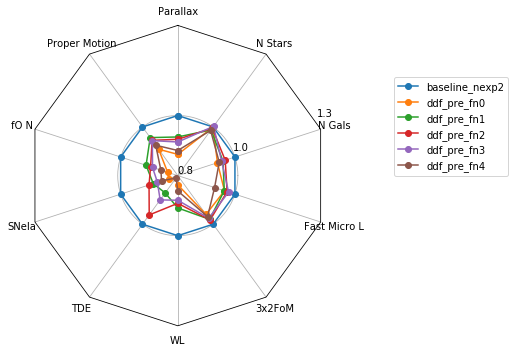

In [8]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.3])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')

In [9]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars
0,baseline_nexp2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,ddf_pre_fn0,0.870722,0.908429,0.835586,0.832248,0.780952,0.830769,0.959620,0.963399,0.938717,0.999426
2,ddf_pre_fn1,0.928590,0.956396,0.911036,0.885993,0.871429,0.907692,0.979914,0.962745,0.958067,0.987823
3,ddf_pre_fn2,0.920779,0.945285,0.895270,0.900651,0.961905,0.892308,0.982872,0.972549,0.965947,0.995027
4,ddf_pre_fn3,0.911886,0.943797,0.888514,0.871336,0.900000,0.882051,0.975139,0.977778,0.953578,1.002838
5,ddf_pre_fn4,0.883522,0.925026,0.859234,0.856678,0.809524,0.851282,0.968703,0.928758,0.945018,0.985753


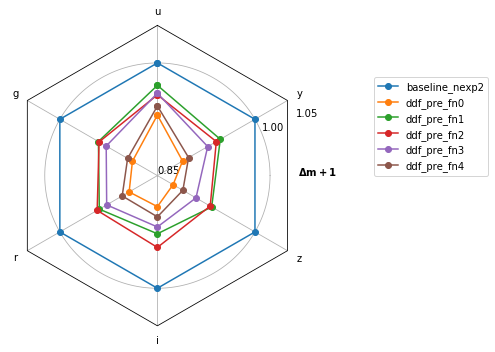

In [38]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp2',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.85, 1.0, 1.05], alpha=.1)
fig.text(.68,.5, '$\mathbf{\Delta m+1}$',  fontweight='bold')
fig.tight_layout()


In [11]:
data_normed

,runName,u,g,r,i,z,y
0,baseline_nexp2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,ddf_pre_fn0,0.930587,0.888374,0.893451,0.891310,0.874127,0.888744
2,ddf_pre_fn1,0.970190,0.940720,0.939296,0.927472,0.933454,0.946719
3,ddf_pre_fn2,0.957550,0.939666,0.942629,0.945628,0.931184,0.940585
4,ddf_pre_fn3,0.959710,0.928720,0.927979,0.918379,0.909317,0.927327
5,ddf_pre_fn4,0.942681,0.895803,0.904117,0.904911,0.889156,0.897963


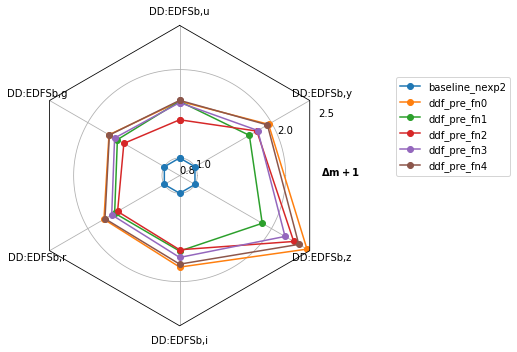

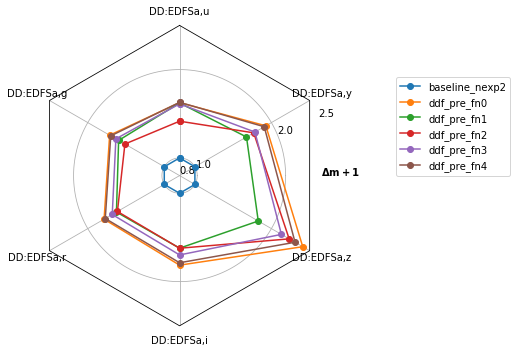

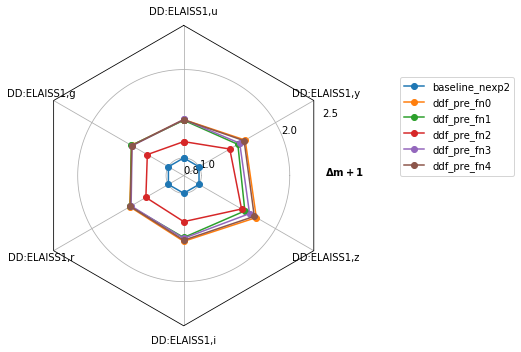

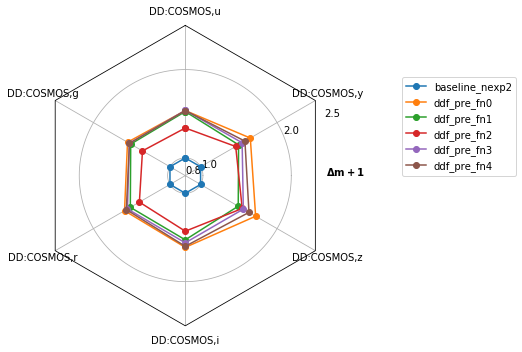

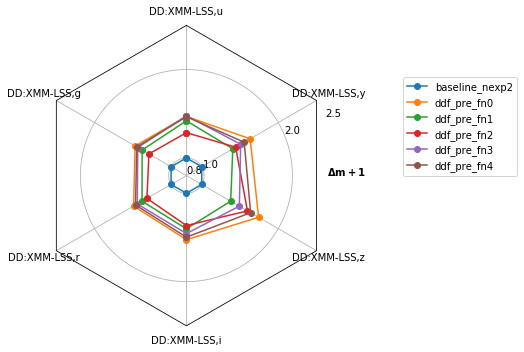

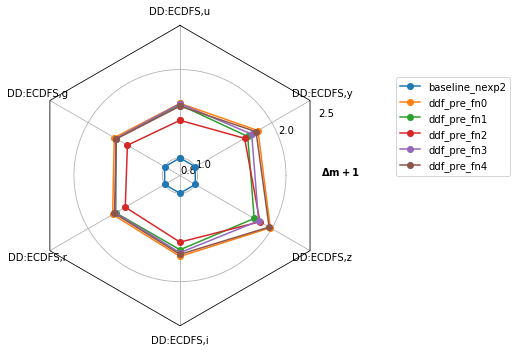

In [40]:
ddf_names = list(set([name.split(',')[0] for name in data.columns if 'DD:' in name]))
ddf_names = [name for name in ddf_names if name != 'DD:EDFS']

for ddf_name in ddf_names:
    cols = [name for name in data.columns if ddf_name in name]
    cols.append('runName')
    data_normed = norm_df(data, runs, cols, norm_run='baseline_nexp2',
                          invert_cols=None, mag_cols='all')
    #data_normed = data_normed.rename(columns=mag_name_mapper)

    fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 2, 2.5], alpha=.1)
    fig.text(.68,.5, '$\mathbf{\Delta m+1}$',  fontweight='bold')
    fig.tight_layout()